<a href="https://colab.research.google.com/github/ubinix-warun/mad-bootcamp-2024/blob/main/colab/MAD_week2_1_real_usecase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***This notebook is a part of chapter 4.8***

#1. Introduction to problem
What species do iris flowers belong to based on their sepal width/length and petal width/length ?

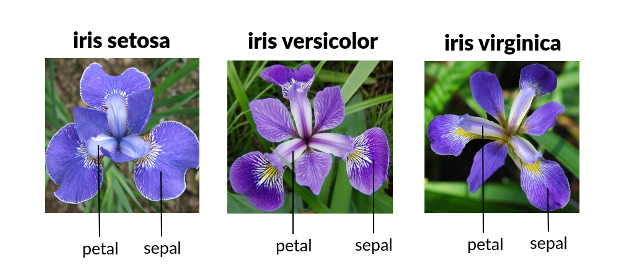

#2. Import library and load dataset

In [ ]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load dataset iris using seaborn
iris = sns.load_dataset('iris')

# Display first few rows of the dataset
print("Iris Dataset:")
print(iris.head())

Iris Dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# 3. Visualize some informative data from this dataset

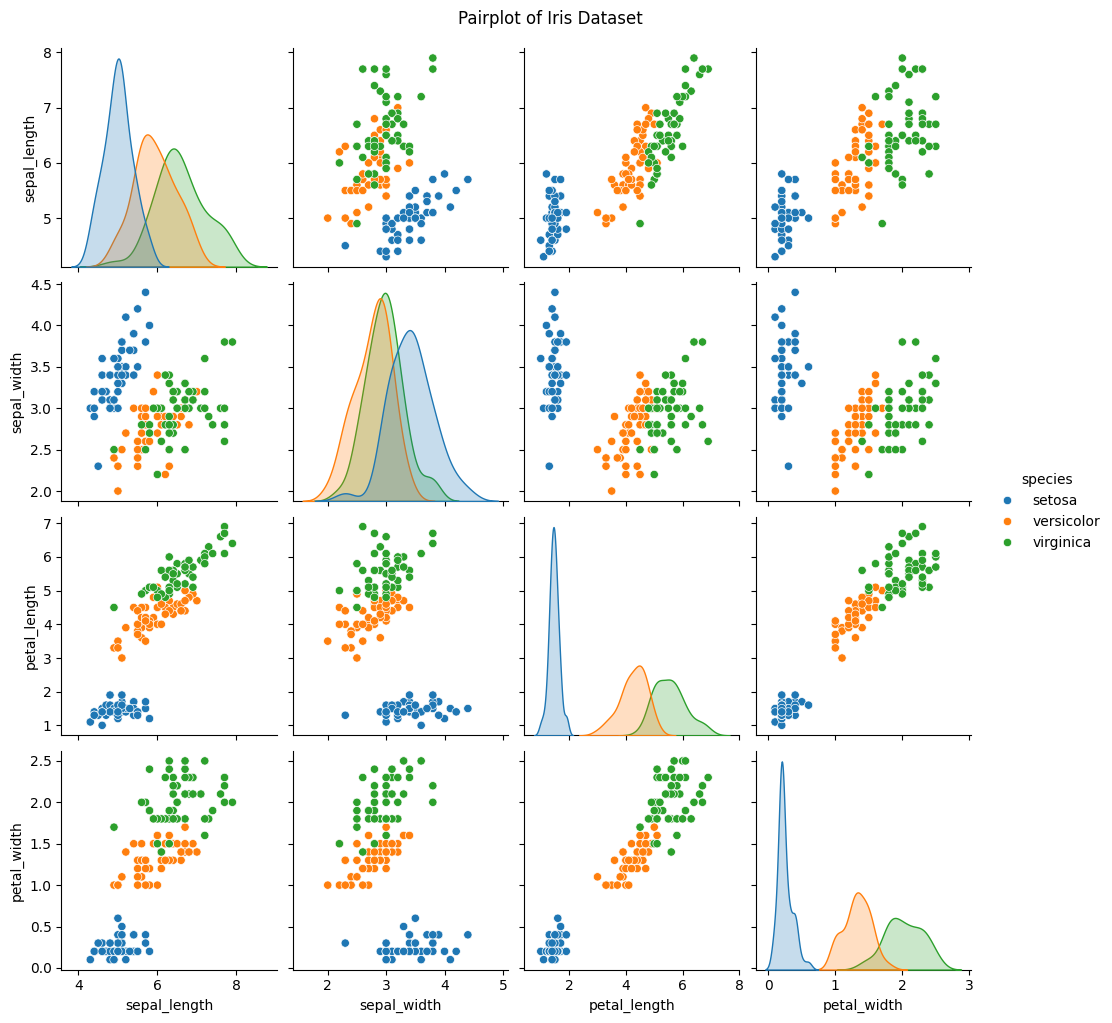

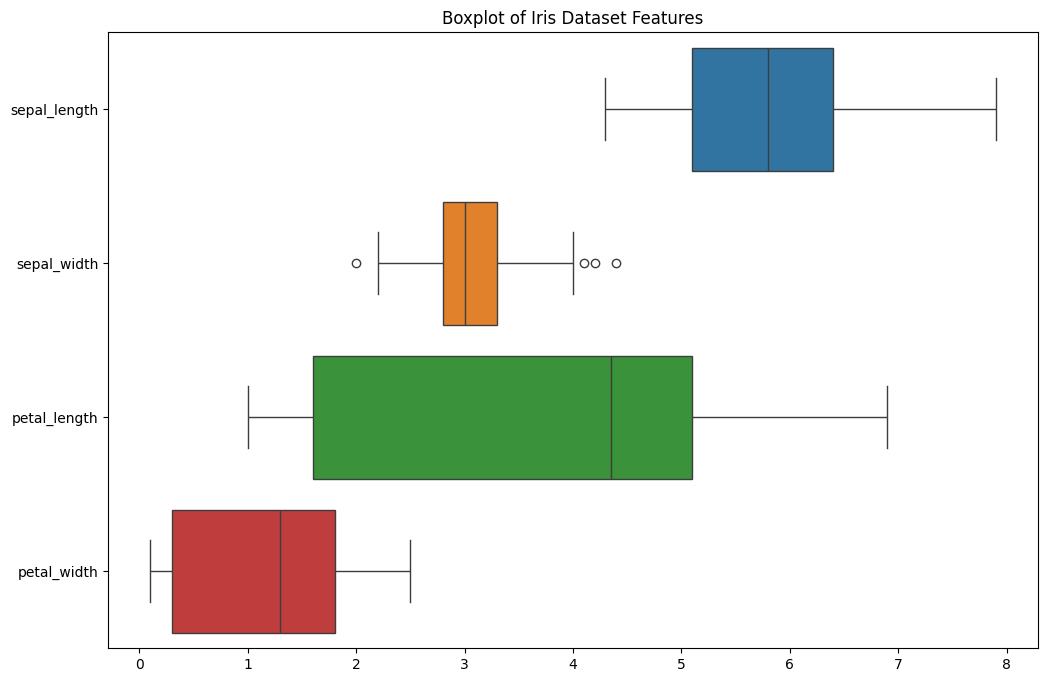

In [ ]:
# Pairplot to visualize the relationships between features
sns.pairplot(iris, hue='species')
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()

# Boxplot to visualize the distribution of each feature by species
plt.figure(figsize=(12, 8))
sns.boxplot(data=iris, orient="h")
plt.title('Boxplot of Iris Dataset Features')
plt.show()

# 4. Solve the problem using logistic regression.

In [ ]:
# Prepare the data
X = iris.drop(columns='species')
y = iris['species']

# Convert target variable to numerical format
y = pd.get_dummies(y).values.argmax(axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Create and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.8666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30

Confusion Matrix:
 [[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]


# 5. Interpret results.

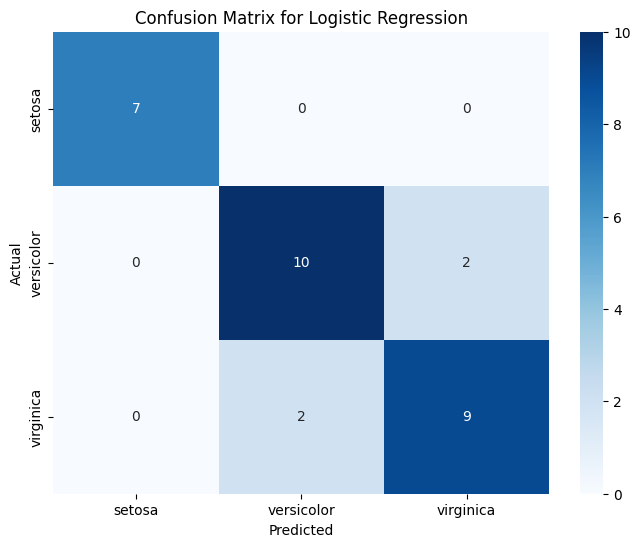

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=iris['species'].unique(), yticklabels=iris['species'].unique())
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()